In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

chosen_counties=["HARRIS COUNTY", 
                 "MONTGOMERY COUNTY", 
                 "GALVESTON COUNTY", 
                 "TRINITY COUNTY", 
                 "FORT BEND COUNTY"]


In [2]:
real_estate_data=pd.read_csv("summary_csv/zillow_df_by_county_merged.csv")
real_estate_data.head()

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year
0,HARRIS COUNTY,County,TX,1996-01-31,102970.0,88773.0,220080.0,137435.0,88562.0,67359.0,82023.0,1996
1,FORT BEND COUNTY,County,TX,1996-01-31,139204.0,101287.0,244549.0,164644.0,94637.0,86009.0,98842.0,1996
2,MONTGOMERY COUNTY,County,TX,1996-01-31,146201.0,96672.0,310134.0,192314.0,121039.0,86705.0,64666.0,1996
3,GALVESTON COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
4,TRINITY COUNTY,County,TX,1996-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996


In [3]:
population_data=pd.read_csv("summary_csv/reset_totalpop.csv")
population_data

,County,Year,Estimated Population
0,HARRIS COUNTY,2018,4676913
1,FORT BEND COUNTY,2018,789269
2,MONTGOMERY COUNTY,2018,590127
3,TRINITY COUNTY,2018,14672
4,GALVESTON COUNTY,2018,337639
5,HARRIS COUNTY,2019,4709243
6,FORT BEND COUNTY,2019,812737
7,MONTGOMERY COUNTY,2019,607583
8,TRINITY COUNTY,2019,14675
9,GALVESTON COUNTY,2019,341541


In [4]:
unemployment_data=pd.read_csv("summary_csv/reset_totalunemply.csv")
unemployment_data

,County,Year,Unemployment Rate (%)
0,HARRIS COUNTY,2018,4.4
1,FORT BEND COUNTY,2018,4.0
2,MONTGOMERY COUNTY,2018,3.8
3,TRINITY COUNTY,2018,5.2
4,GALVESTON COUNTY,2018,4.7
5,HARRIS COUNTY,2019,3.9
6,FORT BEND COUNTY,2019,3.5
7,MONTGOMERY COUNTY,2019,3.4
8,TRINITY COUNTY,2019,4.8
9,GALVESTON COUNTY,2019,4.0


In [5]:
summary1=population_data.merge(unemployment_data, on=['County','Year'])
summary1

,County,Year,Estimated Population,Unemployment Rate (%)
0,HARRIS COUNTY,2018,4676913,4.4
1,FORT BEND COUNTY,2018,789269,4.0
2,MONTGOMERY COUNTY,2018,590127,3.8
3,TRINITY COUNTY,2018,14672,5.2
4,GALVESTON COUNTY,2018,337639,4.7
5,HARRIS COUNTY,2019,4709243,3.9
6,FORT BEND COUNTY,2019,812737,3.5
7,MONTGOMERY COUNTY,2019,607583,3.4
8,TRINITY COUNTY,2019,14675,4.8
9,GALVESTON COUNTY,2019,341541,4.0


In [6]:
summary2=real_estate_data.merge(summary1, on=['County','Year'])
summary2['Date']=pd.to_datetime(summary2['Date'])


In [7]:
summary2['County'].unique()

array(['HARRIS COUNTY', 'FORT BEND COUNTY', 'MONTGOMERY COUNTY',
       'GALVESTON COUNTY', 'TRINITY COUNTY'], dtype=object)

In [137]:
# count=0
# # plt.figure(figsize=(10,15))

# for county in summary2['County'].unique():
# #     data=summary2[summary2['County']==county]
#     plt.figure(figsize=(7,3))
# #     plt.figure()
# #     plt.scatter(data['Year'],data['zhvi_single_family_homes_by_county'], label=data['zhvi_single_family_homes_by_county'])
#     plt.plot(data['Date'],data['zhvi_1_homes_by_county'], label=f"{county} - zhvi_1_homes_by_county")#, marker='o')
#     plt.plot(data['Date'],data['zhvi_2_homes_by_county'], label=f"{county} - zhvi_2_homes_by_county")
#     plt.plot(data['Date'],data['zhvi_3_homes_by_county'], label=f"{county} - zhvi_3_homes_by_county")
#     plt.plot(data['Date'],data['zhvi_4_homes_by_county'], label=f"{county} - zhvi_4_homes_by_county")

#     plt.xlabel('Date')
#     #     plt.xticks(np.arange(1,len(data['Date']),1),data['Date'].dt.year())
#     plt.title(str(county))
#     plt.legend()
#     plt.tight_layout()
#     plt.ylim([0,400000])
#     plt.grid(alpha=0.25)
# #     plt.show()
    

In [136]:
# count=0
# # plt.figure(figsize=(10,15))
# plt.figure(figsize=(10,7))
    
# for county in summary2['County'].unique():
#     data=summary2[summary2['County']==county]
# #     plt.figure()
#     plt.plot(data['Date'],data['zhvi_single_family_homes_by_county'], label=f"{county} - zhvi_single_family_homes_by_county")

#     plt.xlabel('Date')
#     #     plt.xticks(np.arange(1,len(data['Date']),1),data['Date'].dt.year())
#     plt.title("Single family ZHVI")
#     plt.legend()
#     plt.tight_layout()
#     plt.ylim([50000,300000])
#     plt.xlim([dt.date(2019, 10, 1), dt.date(2021, 1, 1)])
#     plt.grid(alpha=0.25)
# #     plt.show()
    

In [10]:
# ------------------------------------------  COVID data --------------------------------------------

In [11]:
jh_data_raw=pd.read_csv("data/jhcovid/COVID19_policies_cases_and_deaths_5_counties_TX.csv")
jh_data_raw['Date']=pd.to_datetime(jh_data_raw['Date'])
jh_data=jh_data_raw[(jh_data_raw['Deaths']>=0) & (jh_data_raw['Cases']>=0)]
jh_data.describe()

,Population,Cases,Deaths
count,2.468000e+03,2468.000000,2468.000000
mean,1.302289e+06,228.732577,3.311588
std,1.731751e+06,565.571141,7.991214
min,1.465100e+04,0.000000,0.000000
25%,3.421390e+05,0.000000,0.000000
50%,6.073910e+05,25.000000,0.000000
75%,8.116880e+05,196.250000,2.000000
max,4.713325e+06,14129.000000,63.000000


In [12]:
summary2.head()

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year,Estimated Population,Unemployment Rate (%)
0,HARRIS COUNTY,County,TX,2018-01-31,189251.0,126741.0,356531.0,232553.0,165768.0,120725.0,104486.0,2018,4676913,4.4
1,HARRIS COUNTY,County,TX,2018-02-28,189813.0,127002.0,356784.0,232969.0,166421.0,121133.0,104736.0,2018,4676913,4.4
2,HARRIS COUNTY,County,TX,2018-03-31,190525.0,127389.0,357200.0,233623.0,167186.0,121657.0,105123.0,2018,4676913,4.4
3,HARRIS COUNTY,County,TX,2018-04-30,191614.0,128050.0,358215.0,234676.0,168229.0,122625.0,105856.0,2018,4676913,4.4
4,HARRIS COUNTY,County,TX,2018-05-31,192775.0,128842.0,359420.0,235780.0,169364.0,123681.0,106667.0,2018,4676913,4.4


In [17]:
jh_data['YYYY-MM']=pd.to_datetime(jh_data['Date']).dt.strftime('%Y-%m')
jh_data.head()

<ipython-input-17-4ffe1e0898ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jh_data['YYYY-MM']=pd.to_datetime(jh_data['Date']).dt.strftime('%Y-%m')


,Date,County,Population,Cases,Deaths,Policies & Announcements (Texas Government),YYYY-MM
0,2020-01-22,FORT BEND COUNTY,811688,0,0,None,2020-01
1,2020-01-23,FORT BEND COUNTY,811688,0,0,None,2020-01
2,2020-01-24,FORT BEND COUNTY,811688,0,0,None,2020-01
3,2020-01-25,FORT BEND COUNTY,811688,0,0,None,2020-01
4,2020-01-26,FORT BEND COUNTY,811688,0,0,None,2020-01


In [26]:
# Real estate data is provided at teh end of each months, while JH Covid data is provided on a daily basis. 
# So we will group JH Covid data by year-month and County indicators and calculate population as average 
# of all entries (stays constant) and Cases and Death as sum for each year-month group
jh_data_groupByMonth=pd.DataFrame(
    { 
        "Population": jh_data.groupby(by=['YYYY-MM','County']).mean()['Population'],
        "Cases": jh_data.groupby(by=['YYYY-MM','County']).sum()['Cases'],
        "Deaths": jh_data.groupby(by=['YYYY-MM','County']).sum()['Deaths']  
    }
)

jh_data_groupByMonth.head()
# jh_data.head()

Population  Cases  Deaths
YYYY-MM County                                      
2020-01 FORT BEND COUNTY     811688.0      0       0
        GALVESTON COUNTY     342139.0      0       0
        HARRIS COUNTY       4713325.0      0       0
        MONTGOMERY COUNTY   1017984.4      0       0
        TRINITY COUNTY        14651.0      0       0

In [28]:
# Next we will reset index for DF
jh_data_groupByMonth=jh_data_groupByMonth.reset_index()
jh_data_groupByMonth.head()

,YYYY-MM,County,Population,Cases,Deaths
0,2020-01,FORT BEND COUNTY,811688.0,0,0
1,2020-01,GALVESTON COUNTY,342139.0,0,0
2,2020-01,HARRIS COUNTY,4713325.0,0,0
3,2020-01,MONTGOMERY COUNTY,1017984.4,0,0
4,2020-01,TRINITY COUNTY,14651.0,0,0


In [37]:
# Calculated % of death from number of cases
jh_data_groupByMonth['% death vs cases']=jh_data_groupByMonth['Deaths']/jh_data_groupByMonth['Cases']
jh_data_groupByMonth.head()

,YYYY-MM,County,Population,Cases,Deaths,% death vs cases
0,2020-01,FORT BEND COUNTY,811688.0,0,0,NaN
1,2020-01,GALVESTON COUNTY,342139.0,0,0,NaN
2,2020-01,HARRIS COUNTY,4713325.0,0,0,NaN
3,2020-01,MONTGOMERY COUNTY,1017984.4,0,0,NaN
4,2020-01,TRINITY COUNTY,14651.0,0,0,NaN


In [18]:
summary2['YYYY-MM']=pd.to_datetime(summary2['Date']).dt.strftime('%Y-%m')
summary2.head()

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year,Estimated Population,Unemployment Rate (%),YYYY-MM
0,HARRIS COUNTY,County,TX,2018-01-31,189251.0,126741.0,356531.0,232553.0,165768.0,120725.0,104486.0,2018,4676913,4.4,2018-01
1,HARRIS COUNTY,County,TX,2018-02-28,189813.0,127002.0,356784.0,232969.0,166421.0,121133.0,104736.0,2018,4676913,4.4,2018-02
2,HARRIS COUNTY,County,TX,2018-03-31,190525.0,127389.0,357200.0,233623.0,167186.0,121657.0,105123.0,2018,4676913,4.4,2018-03
3,HARRIS COUNTY,County,TX,2018-04-30,191614.0,128050.0,358215.0,234676.0,168229.0,122625.0,105856.0,2018,4676913,4.4,2018-04
4,HARRIS COUNTY,County,TX,2018-05-31,192775.0,128842.0,359420.0,235780.0,169364.0,123681.0,106667.0,2018,4676913,4.4,2018-05


In [38]:
summary_all=summary2.merge(jh_data_groupByMonth, on=['County','YYYY-MM'], how='outer')
summary_all

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year,Estimated Population,Unemployment Rate (%),YYYY-MM,Population,Cases,Deaths,% death vs cases
0,HARRIS COUNTY,County,TX,2018-01-31,189251.0,126741.0,356531.0,232553.0,165768.0,120725.0,104486.0,2018.0,4676913.0,4.4,2018-01,NaN,NaN,NaN,NaN
1,HARRIS COUNTY,County,TX,2018-02-28,189813.0,127002.0,356784.0,232969.0,166421.0,121133.0,104736.0,2018.0,4676913.0,4.4,2018-02,NaN,NaN,NaN,NaN
2,HARRIS COUNTY,County,TX,2018-03-31,190525.0,127389.0,357200.0,233623.0,167186.0,121657.0,105123.0,2018.0,4676913.0,4.4,2018-03,NaN,NaN,NaN,NaN
3,HARRIS COUNTY,County,TX,2018-04-30,191614.0,128050.0,358215.0,234676.0,168229.0,122625.0,105856.0,2018.0,4676913.0,4.4,2018-04,NaN,NaN,NaN,NaN
4,HARRIS COUNTY,County,TX,2018-05-31,192775.0,128842.0,359420.0,235780.0,169364.0,123681.0,106667.0,2018.0,4676913.0,4.4,2018-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,FORT BEND COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,811688.0,1942.0,21.0,0.010814
201,GALVESTON COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,342139.0,1392.0,15.0,0.010776
202,HARRIS COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,4713325.0,8093.0,233.0,0.028790
203,MONTGOMERY COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,607391.0,1836.0,28.0,0.015251


In [39]:
summary_all=summary_all.rename(columns = {"Population": "Population JH"})
summary_all

,County,RegionType,StateName,Date,zhvi_single_family_homes_by_county,zhvi_condo_coop_homes_by_county,zhvi_5plus_homes_by_county,zhvi_4_homes_by_county,zhvi_3_homes_by_county,zhvi_2_homes_by_county,zhvi_1_homes_by_county,Year,Estimated Population,Unemployment Rate (%),YYYY-MM,Population JH,Cases,Deaths,% death vs cases
0,HARRIS COUNTY,County,TX,2018-01-31,189251.0,126741.0,356531.0,232553.0,165768.0,120725.0,104486.0,2018.0,4676913.0,4.4,2018-01,NaN,NaN,NaN,NaN
1,HARRIS COUNTY,County,TX,2018-02-28,189813.0,127002.0,356784.0,232969.0,166421.0,121133.0,104736.0,2018.0,4676913.0,4.4,2018-02,NaN,NaN,NaN,NaN
2,HARRIS COUNTY,County,TX,2018-03-31,190525.0,127389.0,357200.0,233623.0,167186.0,121657.0,105123.0,2018.0,4676913.0,4.4,2018-03,NaN,NaN,NaN,NaN
3,HARRIS COUNTY,County,TX,2018-04-30,191614.0,128050.0,358215.0,234676.0,168229.0,122625.0,105856.0,2018.0,4676913.0,4.4,2018-04,NaN,NaN,NaN,NaN
4,HARRIS COUNTY,County,TX,2018-05-31,192775.0,128842.0,359420.0,235780.0,169364.0,123681.0,106667.0,2018.0,4676913.0,4.4,2018-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,FORT BEND COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,811688.0,1942.0,21.0,0.010814
201,GALVESTON COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,342139.0,1392.0,15.0,0.010776
202,HARRIS COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,4713325.0,8093.0,233.0,0.028790
203,MONTGOMERY COUNTY,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05,607391.0,1836.0,28.0,0.015251


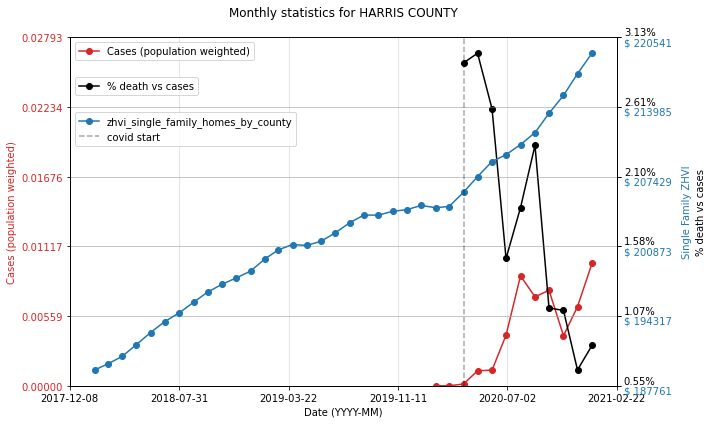

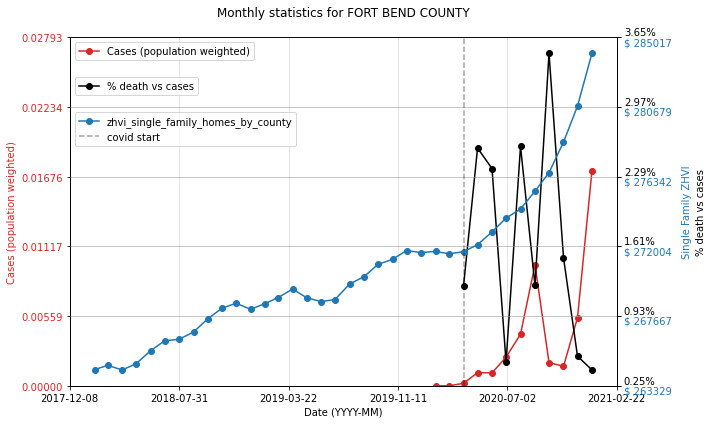

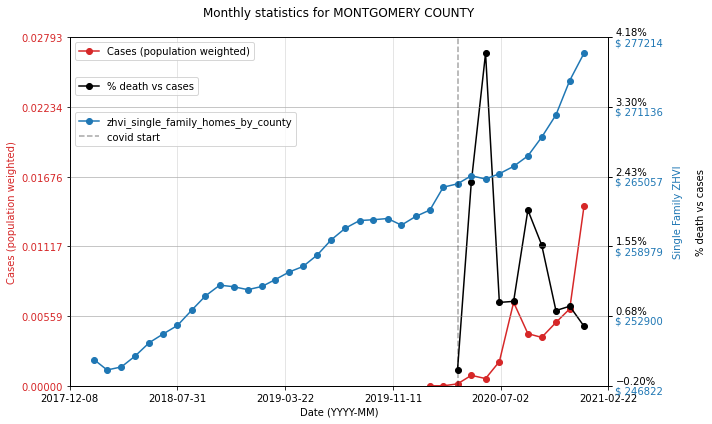

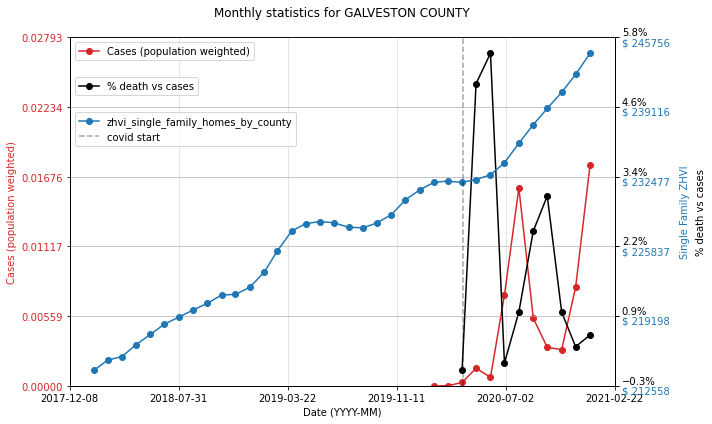

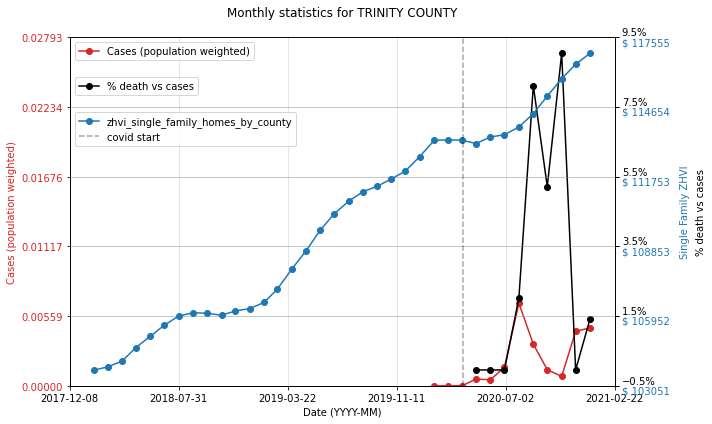

In [160]:
#  plotting main monthly summary stats over time (in YYYY-MM format)
counties=summary_all['County'].unique()

summary_all['Cases (population weighted)']=summary_all['Cases']/summary_all['Population JH']

ymin_cases=summary_all['Cases (population weighted)'].min()
ymax_cases=summary_all['Cases (population weighted)'].max()*1.05

ymin_deaths2cases=summary_all['% death vs cases'].min()
ymax_deaths2cases=summary_all['% death vs cases'].max()*1.5

ymin_zhvi=summary_all['zhvi_single_family_homes_by_county'].min()*0.95
ymax_zhvi=summary_all['zhvi_single_family_homes_by_county'].max()*1.05

import matplotlib.ticker as mtick

nticks = 6

for county in counties:
    data=summary_all[summary_all['County']==county]
    
    fig, ax1 = plt.subplots(figsize=(10,6))

    color = 'tab:red'
    ax1.set_xlabel('Date (YYYY-MM)')
    ax1.set_ylabel('Cases (population weighted)', color=color)
    ax1.plot(data['Date'], 
             data['Cases']/data['Population JH'], 
             color=color, 
             label='Cases (population weighted)', 
             marker='o')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim([ymin_cases, ymax_cases])
    ax1.yaxis.set_major_locator(mtick.LinearLocator(nticks))
#     ax1.xaxis.set_major_locator(mtick.LinearLocator(5))
    ax1.grid(alpha=0.4)
    plt.tight_layout()    
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'k'
#     ax2.set_xlabel('Date')
    ax2.set_ylabel('% death vs cases', color=color,labelpad=40)
    ax2.plot(data['Date'], 
             data['% death vs cases']*100, 
             color=color, 
             label='% death vs cases', 
             marker='o')
    ax2.tick_params(axis='y', labelcolor=color)
#     ax2.set_ylim([ymin_deaths2cases, ymax_deaths2cases])
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax2.yaxis.set_major_locator(mtick.LinearLocator(nticks))
    for tick in ax2.get_yticklabels():
        tick.set_verticalalignment("bottom")
    ax2.grid(alpha=0.4)
    plt.tight_layout() 
    plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
    
    ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax3.set_ylabel('Single Family ZHVI', color=color,labelpad=10)  # we already handled the x-label with ax1
    ax3.plot(data['Date'], 
             data['zhvi_single_family_homes_by_county'], 
             color=color, 
             label="zhvi_single_family_homes_by_county", 
             marker='o')
    ax3.tick_params(axis='y', labelcolor=color)
#     ax3.set_ylim([ymin_zhvi, ymax_zhvi])
    fmt = '$ %.0f'
    tick = mtick.FormatStrFormatter(fmt)
    ax3.yaxis.set_major_formatter(tick)
    ax3.yaxis.set_major_locator(mtick.LinearLocator(nticks))
    for tick in ax3.get_yticklabels():
        tick.set_verticalalignment("top")
    ax3.grid(alpha=0.4)
    
    ax3.xaxis.set_major_locator(mtick.LinearLocator(nticks))
    
    plt.axvline(dt.datetime(2020, 4, 1), c='k', alpha=0.35, label="covid start", linestyle='--')
    
    plt.tight_layout() 
    plt.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
    plt.grid(alpha=0.45)
    plt.title(f"Monthly statistics for {county}\n")

    plt.tight_layout()  # otherwise the right y-label is slightly clipped
       
    county_formatted=str(county).replace(" ", "_")
    #     print("getting ready to save to " + "figures/summary_stats_4_" + county_formatted + ".png file")
    plt.savefig("figures/summary_stats_4_" + county_formatted + ".png")
    plt.show()


In [145]:
zillow_indicators=summary_all.columns[data.columns.str.contains('zhvi')]
zillow_indicators

Index(['zhvi_single_family_homes_by_county', 'zhvi_condo_coop_homes_by_county',
       'zhvi_5plus_homes_by_county', 'zhvi_4_homes_by_county',
       'zhvi_3_homes_by_county', 'zhvi_2_homes_by_county',
       'zhvi_1_homes_by_county'],
      dtype='object')

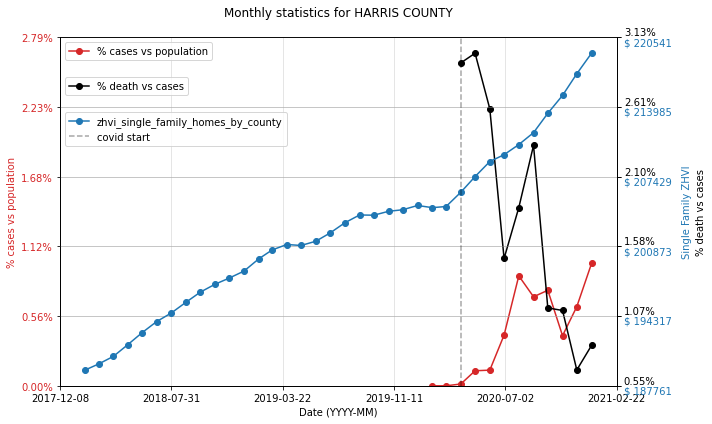

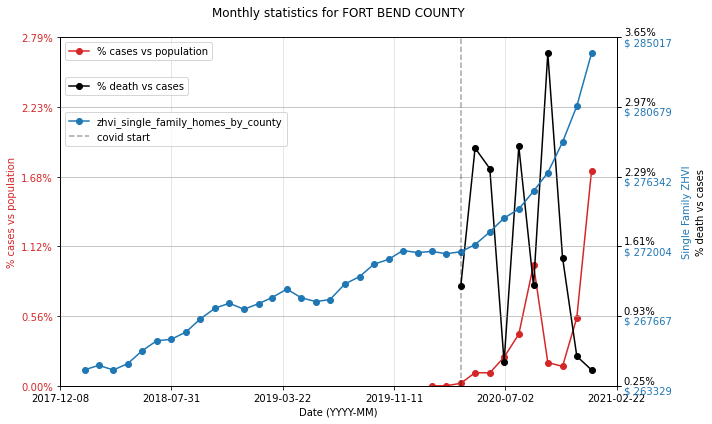

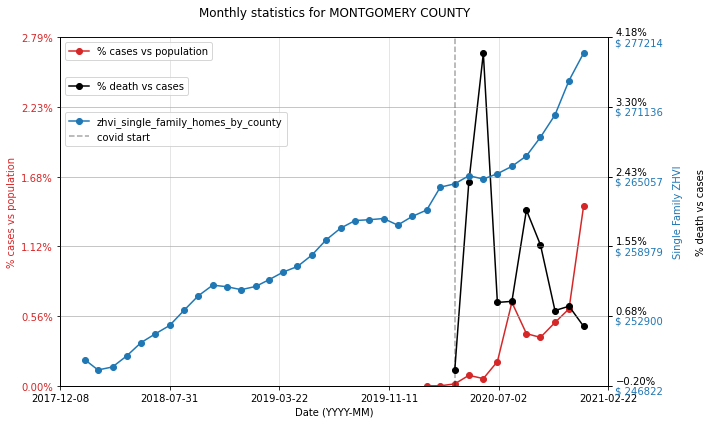

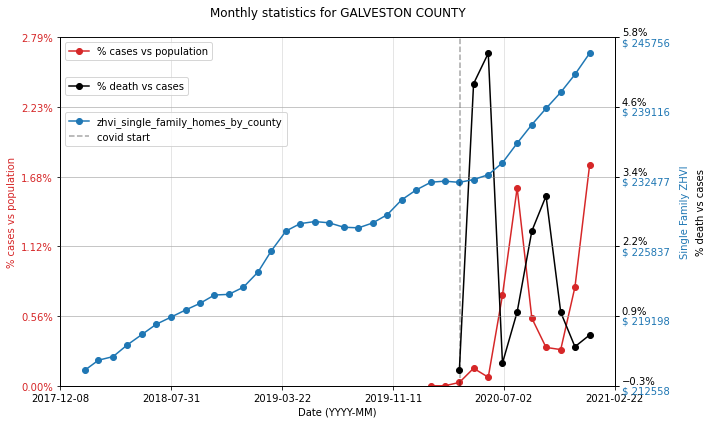

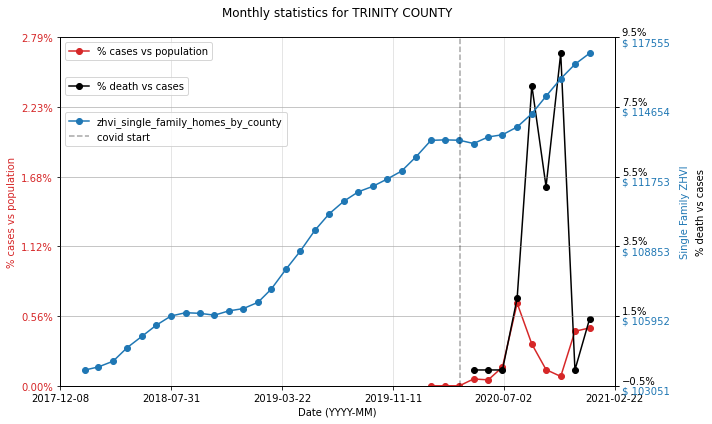

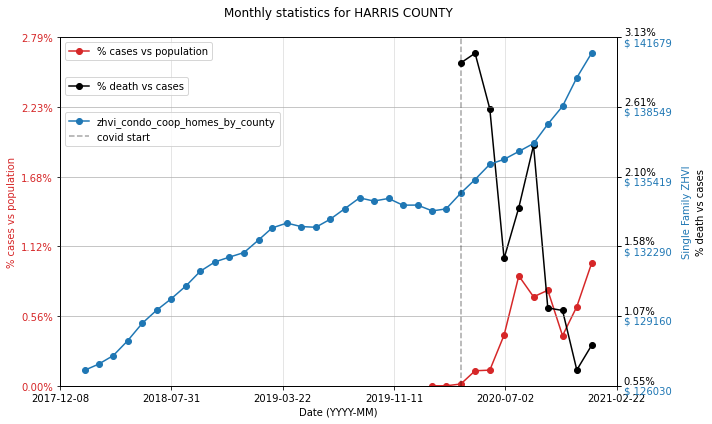

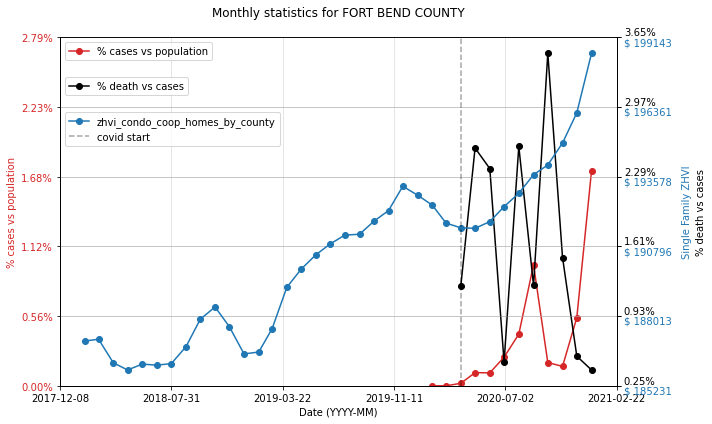

In [ ]:
counties=summary_all['County'].unique()
# Identify columns which contain zillow measures
zillow_indicators=summary_all.columns[data.columns.str.contains('zhvi')]

summary_all['Cases (population weighted)']=100*summary_all['Cases']/summary_all['Population JH']

ymin_cases=summary_all['Cases (population weighted)'].min()
ymax_cases=summary_all['Cases (population weighted)'].max()*1.05

ymin_deaths2cases=summary_all['% death vs cases'].min()
ymax_deaths2cases=summary_all['% death vs cases'].max()*1.5

for zhvi in zillow_indicators:
    
    ymin_zhvi=summary_all[zhvi].min()*0.95
    ymax_zhvi=summary_all[zhvi].max()*1.05

    import matplotlib.ticker as mtick

    nticks = 6

    for county in counties:
        data=summary_all[summary_all['County']==county]

        fig, ax1 = plt.subplots(figsize=(10,6))

        color = 'tab:red'
        ax1.set_xlabel('Date (YYYY-MM)')
        ax1.set_ylabel('% cases vs population', color=color)
        ax1.plot(data['Date'], 
                 data['Cases (population weighted)'], 
                 color=color, 
                 label='% cases vs population', 
                 marker='o')
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim([ymin_cases, ymax_cases])
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax1.yaxis.set_major_locator(mtick.LinearLocator(nticks))
        ax1.grid(alpha=0.4)
        plt.tight_layout()    
        plt.legend(loc='upper left', bbox_to_anchor=(0, 1))

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'k'
    #     ax2.set_xlabel('Date')
        ax2.set_ylabel('% death vs cases', color=color,labelpad=40)
        ax2.plot(data['Date'], 
                 data['% death vs cases']*100, 
                 color=color, 
                 label='% death vs cases', 
                 marker='o')
        ax2.tick_params(axis='y', labelcolor=color)
    #     ax2.set_ylim([ymin_deaths2cases, ymax_deaths2cases])
        ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax2.yaxis.set_major_locator(mtick.LinearLocator(nticks))
        for tick in ax2.get_yticklabels():
            tick.set_verticalalignment("bottom")
        ax2.grid(alpha=0.4)
        plt.tight_layout() 
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

        ax3 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax3.set_ylabel('Single Family ZHVI', color=color,labelpad=10)  # we already handled the x-label with ax1
        ax3.plot(data['Date'], 
                 data[zhvi], 
                 color=color, 
                 label=zhvi, 
                 marker='o')
        ax3.tick_params(axis='y', labelcolor=color)
    #     ax3.set_ylim([ymin_zhvi, ymax_zhvi])
        fmt = '$ %.0f'
        tick = mtick.FormatStrFormatter(fmt)
        ax3.yaxis.set_major_formatter(tick)
        ax3.yaxis.set_major_locator(mtick.LinearLocator(nticks))
        for tick in ax3.get_yticklabels():
            tick.set_verticalalignment("top")
        ax3.xaxis.set_major_locator(mtick.LinearLocator(nticks))
        ax3.grid(alpha=0.4)

        plt.axvline(dt.datetime(2020, 4, 1), c='k', alpha=0.35, label="covid start", linestyle='--')

        plt.tight_layout() 
        plt.legend(loc='upper left', bbox_to_anchor=(0, 0.8))
        plt.grid(alpha=0.45)
        plt.title(f"Monthly statistics for {county}\n")

        plt.tight_layout()  # otherwise the right y-label is slightly clipped

        county_formatted=str(county).replace(" ", "_")
        #     print("getting ready to save to " + "figures/summary_stats_4_" + county_formatted + ".png file")
        plt.savefig("figures/summary_stats_4_" + county_formatted + "_" + zhvi + ".png")
        plt.show()
